# Importing Modules

In [49]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as ms
import numpy as np

In [83]:
data = pd.read_csv('hour_train.csv')

# Univariate Analysis

In [77]:
print(data.shape)
data.head()

(13949, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Remove Unnecessary Features

In [95]:
drop_features = {"instant", "dteday"}
data = data.drop(columns=drop_features)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Handeling Types of Features

In [5]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [25]:
categorical_features = {"season", "yr", "mnth", "holiday", "hr", "workingday", "weekday", "weathersit"}
for feature in categorical_features:
    data[feature] = data[feature].astype("category")

In [26]:
data.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

# Missing Data

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


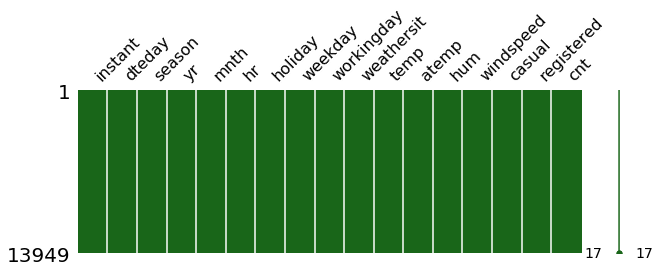

In [84]:
print(data.isnull().sum())
ms.matrix(data,figsize=(10,3), color = (0.1, 0.4, 0.1))

# Distribution

## Distribution Points

In [8]:
data['cnt'].describe()

count    13949.000000
mean       175.092695
std        167.510453
min          1.000000
25%         37.000000
50%        131.000000
75%        259.000000
max        957.000000
Name: cnt, dtype: float64

## Output Distribution

C:\Users\n.zivkovic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


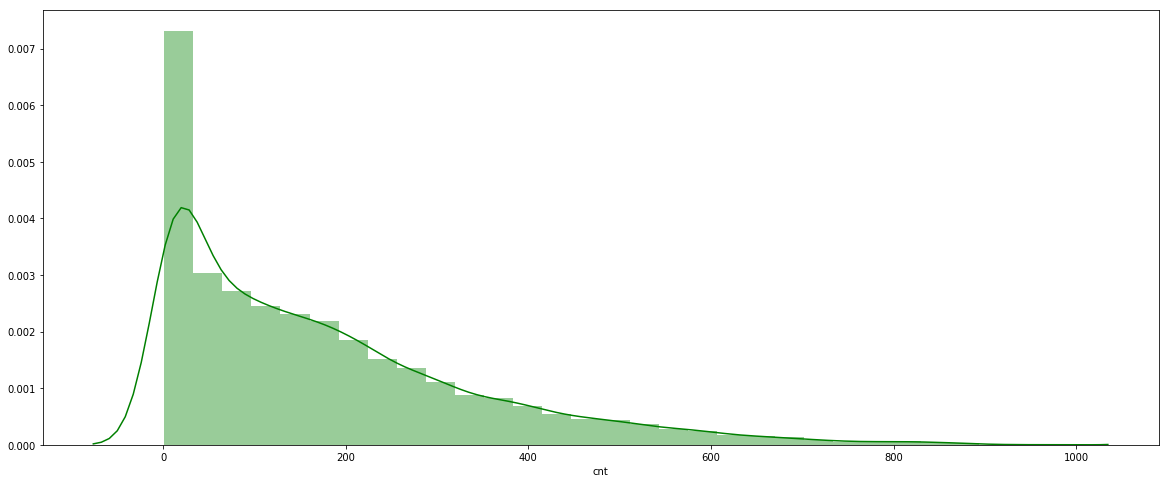

In [92]:
plt.figure(figsize=(20, 8))
sb.distplot(data['cnt'], color='g', bins=30, hist_kws={'alpha': 0.4});

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000011F2A24C50>,
      dtype=object)

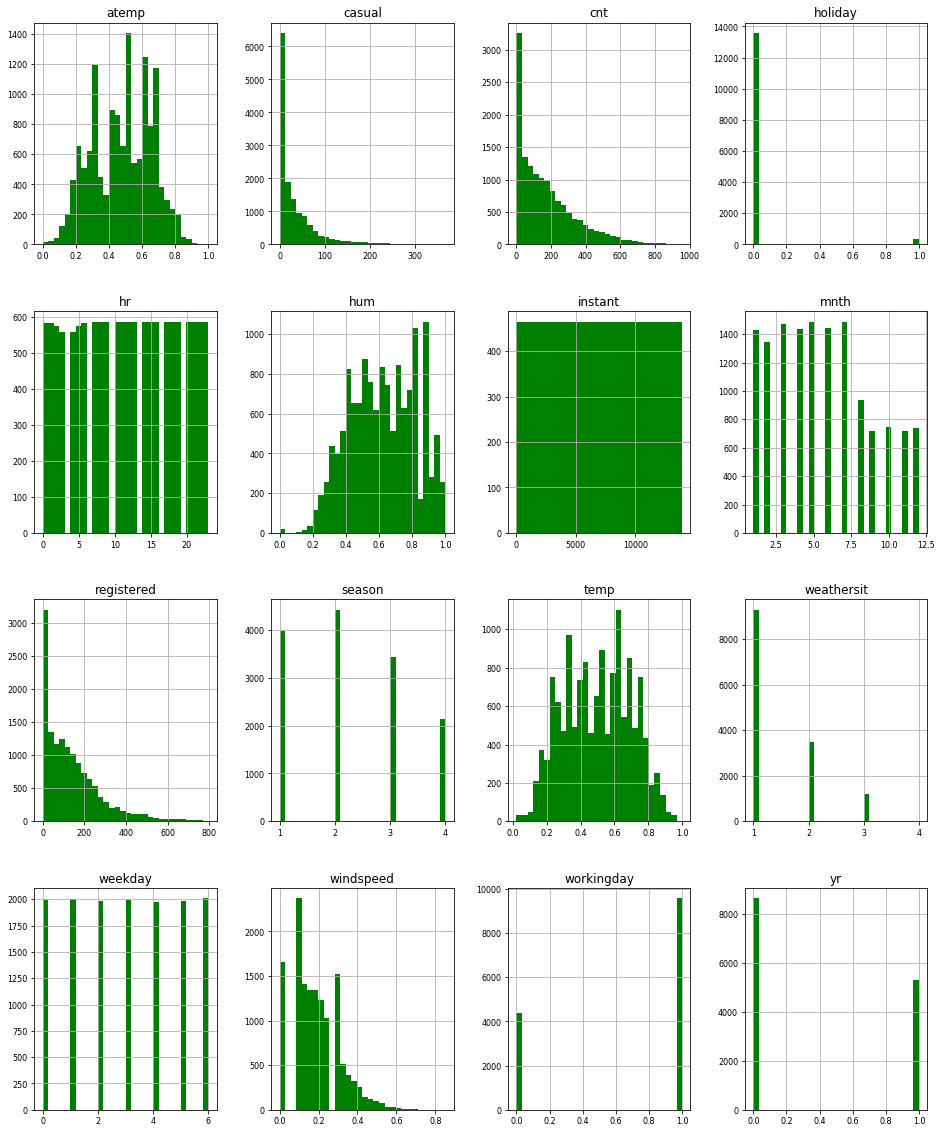

In [93]:
numerical_fetures = data.select_dtypes(include = ['float64', 'int64'])
numerical_fetures.hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

In [105]:
data.median()

season          2.0000
yr              0.0000
mnth            5.0000
hr             12.0000
holiday         0.0000
weekday         3.0000
workingday      1.0000
weathersit      1.0000
temp            0.5000
atemp           0.4848
hum             0.6200
windspeed       0.1940
casual         15.0000
registered    107.0000
cnt           131.0000
dtype: float64

In [104]:
data.mode()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2.0,0.0,5,16,0.0,6.0,1.0,1.0,0.7,0.6212,0.88,0.0,0.0,4.0,5.0
1,NaN,NaN,7,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.mean()

In [108]:
data['cnt'].describe()

count    13949.000000
mean       175.092695
std        167.510453
min          1.000000
25%         37.000000
50%        131.000000
75%        259.000000
max        957.000000
Name: cnt, dtype: float64

In [109]:
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000
mean,2.266256,0.380242,5.657897,11.546562,0.027314,2.999283,0.685497,1.420532,0.499973,0.478755,0.623223,0.193826,34.095634,140.997061,175.092695
std,1.035404,0.485464,3.215934,6.912752,0.163002,2.002794,0.464334,0.643801,0.197901,0.176804,0.198058,0.123013,47.333610,138.073442,167.510453
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,31.000000,37.000000
50%,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,15.000000,107.000000,131.000000
75%,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.283600,46.000000,202.000000,259.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,796.000000,957.000000


# Outliers

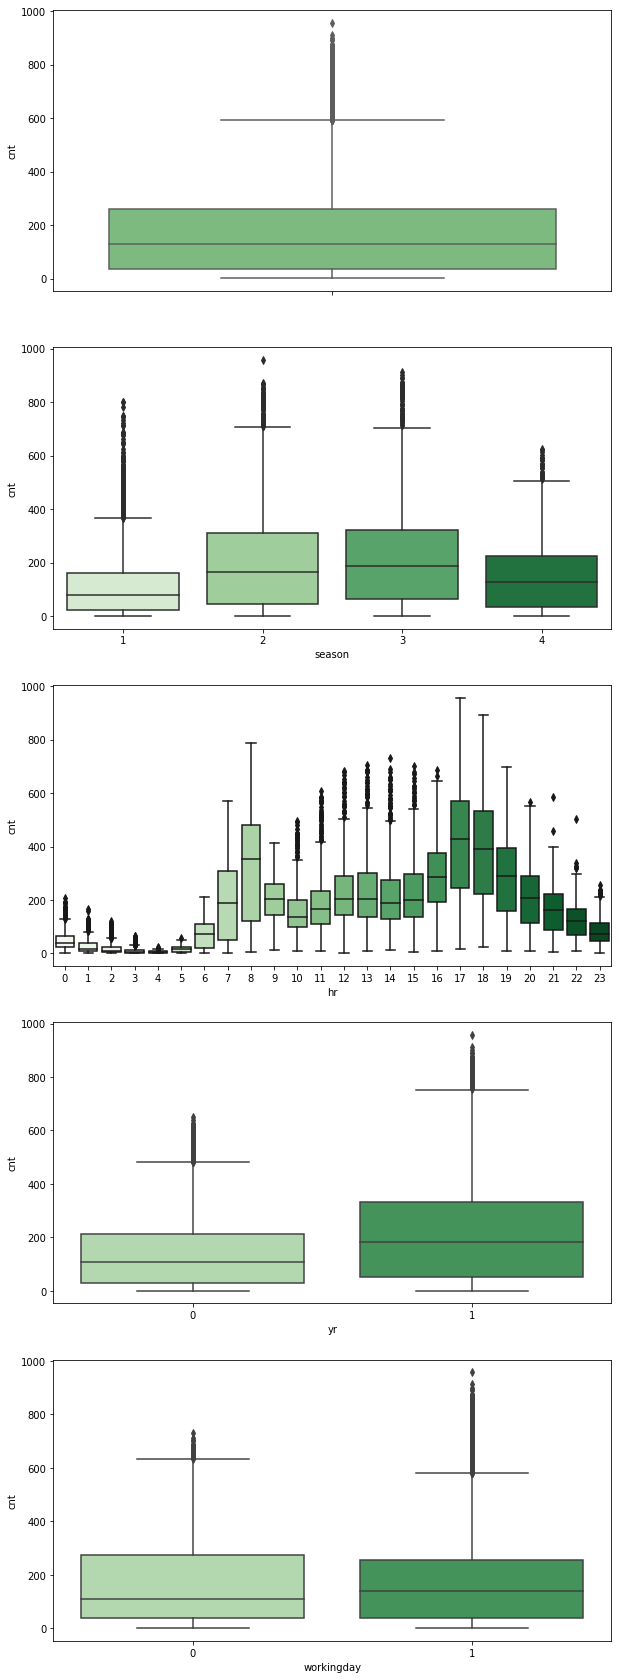

In [72]:
fig, axes = plt.subplots(nrows=5,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="cnt",orient="v",ax=axes[0], palette="Greens")
sb.boxplot(data=data,y="cnt",x="season",orient="v",ax=axes[1], palette="Greens")
sb.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[2], palette="Greens")
sb.boxplot(data=data,y="cnt",x="yr",orient="v",ax=axes[3], palette="Greens")
sb.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[4], palette="Greens")

# Linear Relationship

## Scaterplot

In [112]:
data[['cnt', 'registered']].head()

,cnt,registered
0,16,13
1,40,32
2,32,27
3,13,10
4,1,1


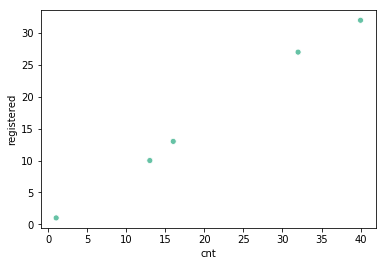

In [120]:
sb.scatterplot(data['cnt'].head(), data['registered'].head(), hue=data['cnt'], legend=False, palette="Set2")

C:\Users\n.zivkovic\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


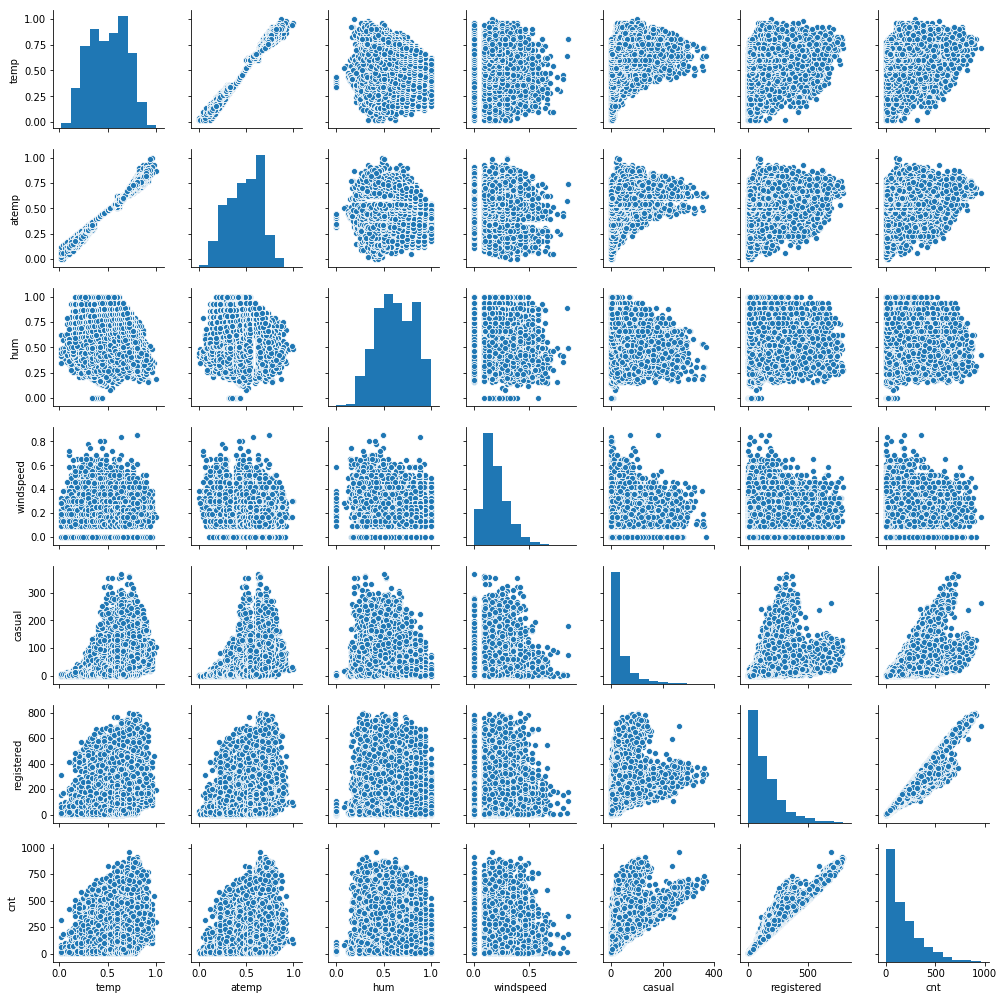

In [75]:
sb.pairplot(numerical_fetures, size=2)

## Correlation Matrix

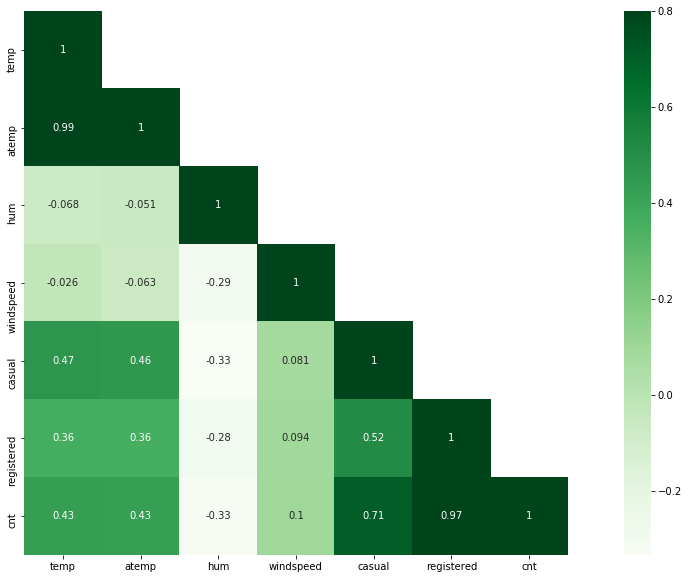

In [52]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sb.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)